<a href="https://colab.research.google.com/github/rizzaesh/Data-Science-Tools/blob/main/ANN_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Foil

feature reduction

pandas renaming

ANN mmodel

Preprocessing

Encoding




In [1]:
link = '/content/drive/MyDrive/A/air foil ann/AirfoilSelfNoise.csv'

In [7]:
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#import tensorflow as tf
import tensorflow.compat.v1 as tf
import keras
from keras.models import Sequential
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = read_csv(link)
data

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [4]:
data.describe()

,f,alpha,c,U_infinity,delta,SSPL
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [5]:
data = data.rename(columns={"f": 'Frequency',"alpha":'Angle of attack',"c":'Chord length',"U_infinity":'Free-stream velocity',"delta":"Section side displacement thickness","SSPL":"Scaled Sound Pressure Level"})
data

,Frequency,Angle of attack,Chord length,Free-stream velocity,Section side displacement thickness,Scaled Sound Pressure Level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


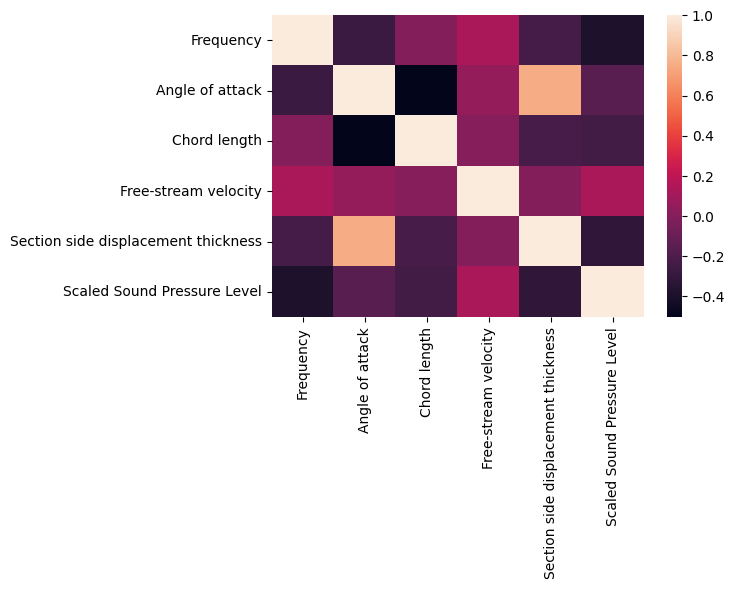

In [11]:
plt.figure(dpi=100)
sns.heatmap(data.corr())

In [12]:
# when two feature have not similarit but with eachother will show the aspect the best
pca = PCA(n_components=1)
pca.fit(np.array(data[["Angle of attack","Section side displacement thickness"]]))
print("variance explained : ",pca.explained_variance_ratio_)

y = pca.transform(np.array(data[["Angle of attack","Section side displacement thickness"]]))
new_component = pd.DataFrame(y)
new_component = new_component.rename(columns={0: 'New component'})
data["New component"] = new_component 
del data["Angle of attack"]
del data["Section side displacement thickness"]

variance explained :  [0.99999787]


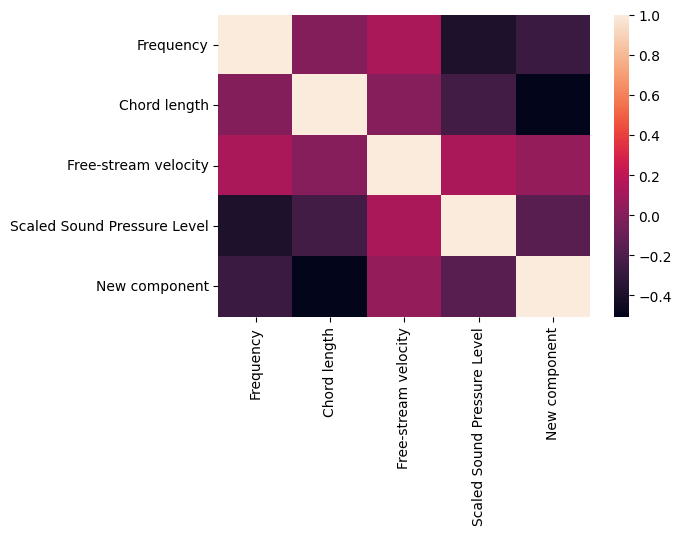

In [13]:
plt.figure(dpi=100)
sns.heatmap(data.corr())

In [39]:
x = np.array(data[["Frequency","Chord length","Free-stream velocity","New component"]])
y = np.array(data[["Scaled Sound Pressure Level"]])
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.70)
scaler = MinMaxScaler()
# transform data
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [32]:
model = tf.keras.models.Sequential()
# Number of 
model.add(tf.keras.Input(shape=(4,)))
model.add(tf.keras.layers.Dense(units=9,activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(units=3))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 9)                 45        
                                                                 
 dense_3 (Dense)             (None, 3)                 30        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


Train on 1052 samples, validate on 451 samples
Epoch 1/100
1052/1052 [==============================] - 1s 500us/sample - loss: 50.0001 - val_loss: 29.1299
Epoch 2/100
1052/1052 [==============================] - 0s 41us/sample - loss: 31.4668 - val_loss: 25.8662


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Epoch 3/100
1052/1052 [==============================] - 0s 35us/sample - loss: 27.1939 - val_loss: 26.2249
Epoch 4/100
1052/1052 [==============================] - 0s 34us/sample - loss: 25.5546 - val_loss: 27.5998
Epoch 5/100
1052/1052 [==============================] - 0s 35us/sample - loss: 25.2331 - val_loss: 24.9445
Epoch 6/100
1052/1052 [==============================] - 0s 54us/sample - loss: 27.4739 - val_loss: 62.0417
Epoch 7/100
1052/1052 [==============================] - 0s 55us/sample - loss: 62.8052 - val_loss: 81.0436
Epoch 8/100
1052/1052 [==============================] - 0s 28us/sample - loss: 39.6684 - val_loss: 24.6484
Epoch 9/100
1052/1052 [==============================] - 0s 32us/sample - loss: 24.5999 - val_loss: 24.4870
Epoch 10/100
1052/1052 [==============================] - 0s 34us/sample - loss: 26.0003 - val_loss: 32.8860
Epoch 11/100
1052/1052 [==============================] - 0s 35us/sample - loss: 26.4577 - val_loss: 29.4115
Epoch 12/100
1052/1052 [==

Text(0.5, 0, 'epoch')

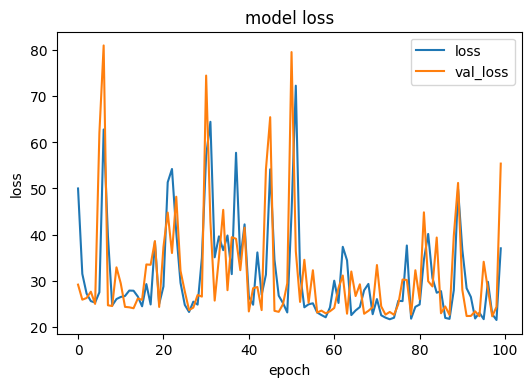

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.70)
scaler = MinMaxScaler()
# transform data
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002),loss="mean_squared_error")
history = model.fit(x_train, y_train,batch_size=100,epochs=100,validation_data=(x_test, y_test))

plt.figure(dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(labels=['loss', 'val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

Train on 1052 samples, validate on 451 samples
Epoch 1/300
1052/1052 [==============================] - 1s 495us/sample - loss: 16.7398 - val_loss: 15.4677
Epoch 2/300
 100/1052 [=>............................] - ETA: 0s - loss: 18.1526

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1052/1052 [==============================] - 0s 39us/sample - loss: 21.5518 - val_loss: 22.9233
Epoch 3/300
1052/1052 [==============================] - 0s 29us/sample - loss: 18.4331 - val_loss: 15.5092
Epoch 4/300
1052/1052 [==============================] - 0s 28us/sample - loss: 16.8862 - val_loss: 18.7923
Epoch 5/300
1052/1052 [==============================] - 0s 29us/sample - loss: 16.0293 - val_loss: 21.0743
Epoch 6/300
1052/1052 [==============================] - 0s 30us/sample - loss: 16.5810 - val_loss: 15.8440
Epoch 7/300
1052/1052 [==============================] - 0s 39us/sample - loss: 16.3133 - val_loss: 18.2329
Epoch 8/300
1052/1052 [==============================] - 0s 32us/sample - loss: 15.3637 - val_loss: 16.0882
Epoch 9/300
1052/1052 [==============================] - 0s 35us/sample - loss: 18.4200 - val_loss: 17.9358
Epoch 10/300
1052/1052 [==============================] - 0s 34us/sample - loss: 19.1092 - val_loss: 15.8658
Epoch 11/300
1052/1052 [===============

Text(0.5, 0, 'epoch')

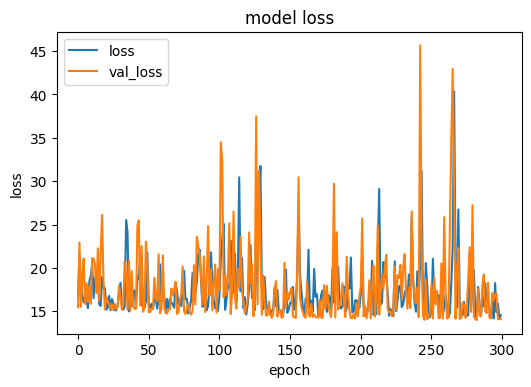

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.70)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002),loss="mean_squared_error")
history = model.fit(x_train, y_train,batch_size=100,epochs=300,validation_data=(x_test, y_test))
plt.figure(dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(labels=['loss', 'val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

Train on 1052 samples, validate on 451 samples
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (451). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


1052/1052 [==============================] - 0s 252us/sample - loss: 525.7542 - val_loss: 571.6710
Epoch 2/100
1052/1052 [==============================] - 0s 27us/sample - loss: 680.5898 - val_loss: 473.9801
Epoch 3/100
1052/1052 [==============================] - 0s 23us/sample - loss: 296.1189 - val_loss: 107.2349
Epoch 4/100
1052/1052 [==============================] - 0s 27us/sample - loss: 153.4943 - val_loss: 217.5966
Epoch 5/100
1052/1052 [==============================] - 0s 21us/sample - loss: 131.0436 - val_loss: 44.9937
Epoch 6/100


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1052/1052 [==============================] - 0s 28us/sample - loss: 62.0873 - val_loss: 40.8103
Epoch 7/100
1052/1052 [==============================] - 0s 26us/sample - loss: 40.7900 - val_loss: 35.2711
Epoch 8/100
1052/1052 [==============================] - 0s 25us/sample - loss: 38.2177 - val_loss: 36.2963
Epoch 9/100
1052/1052 [==============================] - 0s 24us/sample - loss: 42.2503 - val_loss: 38.8910
Epoch 10/100
1052/1052 [==============================] - 0s 25us/sample - loss: 33.3817 - val_loss: 33.2751
Epoch 11/100
1052/1052 [==============================] - 0s 29us/sample - loss: 37.5152 - val_loss: 50.1406
Epoch 12/100
1052/1052 [==============================] - 0s 28us/sample - loss: 38.1656 - val_loss: 34.9957
Epoch 13/100
1052/1052 [==============================] - 0s 26us/sample - loss: 32.8654 - val_loss: 32.0117
Epoch 14/100
1052/1052 [==============================] - 0s 26us/sample - loss: 43.1461 - val_loss: 54.6011
Epoch 15/100
1052/1052 [===========

Text(0.5, 0, 'epoch')

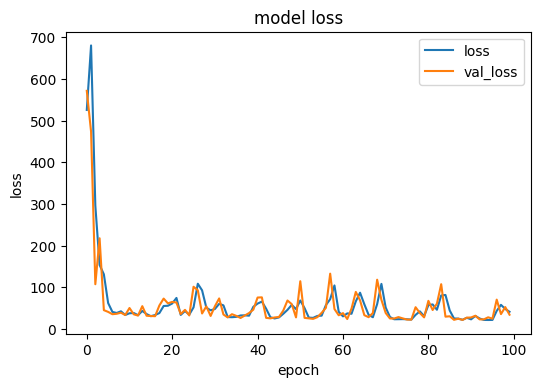

In [35]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.70)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002),loss="mean_squared_error")
history = model.fit(x_train, y_train,batch_size=100,epochs=100,validation_data=(x_test, y_test))
plt.figure(dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(labels=['loss', 'val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

Train on 1052 samples, validate on 451 samples
Epoch 1/500


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (451). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


1052/1052 [==============================] - 0s 246us/sample - loss: 103.6957 - val_loss: 49.9842
Epoch 2/500
1052/1052 [==============================] - 0s 41us/sample - loss: 25.2382 - val_loss: 20.4668
Epoch 3/500
1052/1052 [==============================] - 0s 36us/sample - loss: 23.4966 - val_loss: 56.9510
Epoch 4/500
1052/1052 [==============================] - 0s 34us/sample - loss: 34.0511 - val_loss: 25.2480
Epoch 5/500
  50/1052 [>.............................] - ETA: 0s - loss: 27.5311

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1052/1052 [==============================] - 0s 34us/sample - loss: 24.9054 - val_loss: 41.8309
Epoch 6/500
1052/1052 [==============================] - 0s 39us/sample - loss: 35.3197 - val_loss: 32.1109
Epoch 7/500
1052/1052 [==============================] - 0s 38us/sample - loss: 29.3858 - val_loss: 21.3279
Epoch 8/500
1052/1052 [==============================] - 0s 36us/sample - loss: 31.6807 - val_loss: 22.6635
Epoch 9/500
1052/1052 [==============================] - 0s 36us/sample - loss: 22.2655 - val_loss: 21.1251
Epoch 10/500
1052/1052 [==============================] - 0s 37us/sample - loss: 25.1436 - val_loss: 31.4074
Epoch 11/500
1052/1052 [==============================] - 0s 36us/sample - loss: 42.6634 - val_loss: 29.0279
Epoch 12/500
1052/1052 [==============================] - 0s 44us/sample - loss: 28.7916 - val_loss: 49.5943
Epoch 13/500
1052/1052 [==============================] - 0s 32us/sample - loss: 33.0038 - val_loss: 24.5733
Epoch 14/500
1052/1052 [============

Text(0.5, 0, 'epoch')

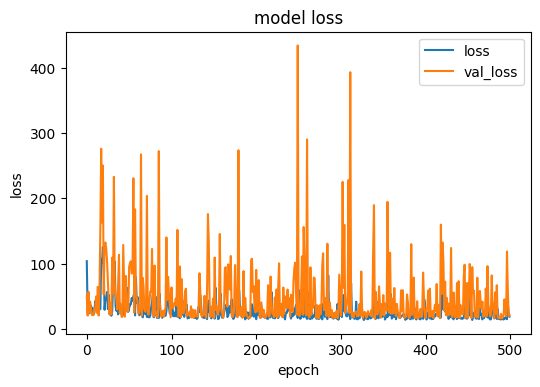

In [34]:
# from sklearn.preprocessing import PowerTransformer(method='box-cox', standardize=False)
# estrictly Positive data
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.70)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002),loss="mean_squared_error")

history = model.fit(x_train, y_train,batch_size=50,epochs=500,validation_data=(x_test, y_test))

plt.figure(dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(labels=['loss', 'val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

enc.transform([['female', 'from US', 'uses Safari']])


array([[0., 1., 1.]])

In [ ]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

In [ ]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()


array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

In [ ]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

In [ ]:
enc.get_feature_names_out()

array(['x0_female', 'x0_male', 'x1_from Europe', 'x1_from US',
       'x2_uses Firefox', 'x2_uses Safari'], dtype=object)

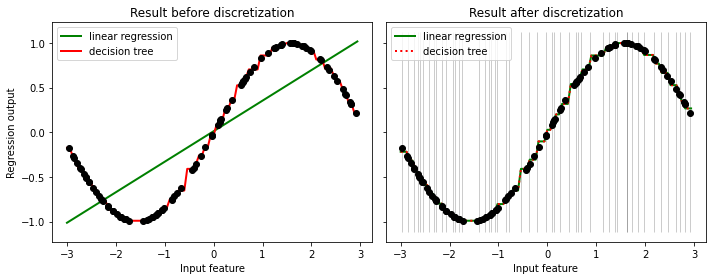

In [ ]:
# Author: Andreas Müller
#         Hanmin Qin <qinhanmin2005@sina.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

# construct the dataset
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X)
# y = np.sin(X) + rnd.normal(size=len(X)) / 3 ##### What is this for?

X = X.reshape(-1, 1)

# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=50, encode="onehot")
X_binned = enc.fit_transform(X)

# predict with original dataset
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
line = np.linspace(-3, 3, 100, endpoint=False).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
yy = reg.predict(line)
ax1.plot(
    line, 
    reg.predict(line), 
    linewidth=2, 
    color="green", 
    label="linear regression"
    )
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)
ax1.plot(
    line, 
    reg.predict(line), 
    linewidth=2, 
    color="red", 
    label="decision tree"
    )
ax1.plot(X[:, 0], y, "o", c="k")
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

# predict with transformed dataset
line_binned = enc.transform(line)
reg = LinearRegression().fit(X_binned, y)
yy2 = reg.predict(line_binned)
ax2.plot(
    line,
    reg.predict(line_binned),
    linewidth=2,
    color="green",
    linestyle="-",
    label="linear regression",
)
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X_binned, y)
ax2.plot(
    line,
    reg.predict(line_binned),
    linewidth=2,
    color="red",
    linestyle=":",
    label="decision tree",
)
ax2.plot(X[:, 0], y, "o", c="k")
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=0.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")

plt.tight_layout()
plt.show()

In [ ]:
y_real = np.sin(line)
len(y_real)
y_pred = reg.predict(line_binned)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_real,yy2)

0.00118875009313648

In [ ]:
y_pred = reg.predict(line_binned)

In [ ]:
y_pred

In [ ]:
y_real

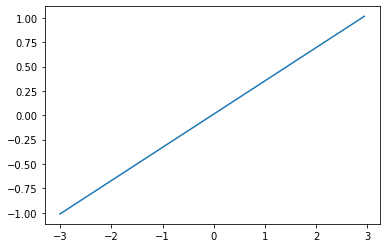

In [ ]:
plt.plot(
    line,yy
)

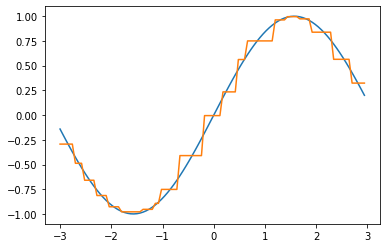

In [ ]:
plt.plot(
    line,y_real
)
plt.plot(
    line,yy2
)

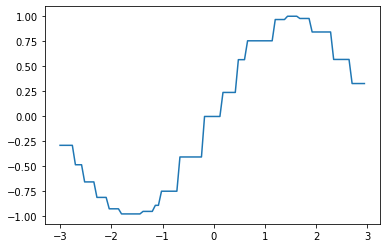

In [ ]:
plt.plot(
    line,yy2
)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_real,yy2)

0.005483380321995156

In [ ]:
line_binned

<100x100 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>